### 1)Utilizando a base de dados archive.ics.uci.edu/ml/datasets/iris:

In [1]:
import pandas as pd

data_iris = pd.read_csv('iris.csv')
iris_class = pd.DataFrame(data_iris['variety'], columns=['variety']) 

data_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_class.head()

,variety
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


#### (a)Calcule a matriz de correlação para todas as variáveis numéricas.

In [6]:
iris_corr = data_iris.corr()
iris_corr

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.109369,0.871754,0.817954
sepal.width,-0.109369,1.000000,-0.420516,-0.356544
petal.length,0.871754,-0.420516,1.000000,0.962757
petal.width,0.817954,-0.356544,0.962757,1.000000


#### (b) Gere um gráfico da matriz de correlação para todas as variáveis numéricas. Pode ser um mapa de calor.

<AxesSubplot:>

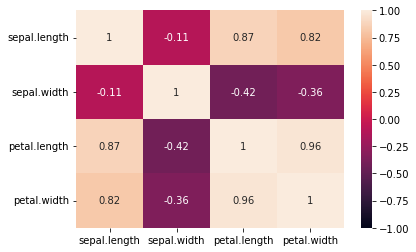

In [32]:
import seaborn as sns

sns.heatmap(iris_corr, vmin=-1, vmax=1, annot=True)

#### (c) Gere o diagrama de dispersão para cada par de variáveis numéricas. Não deve destacar as classes.

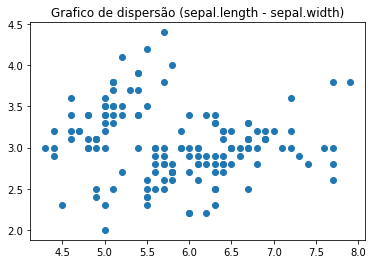

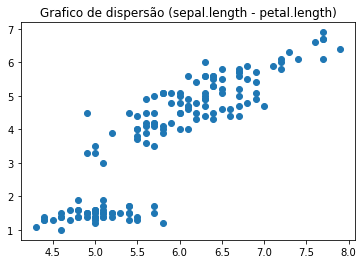

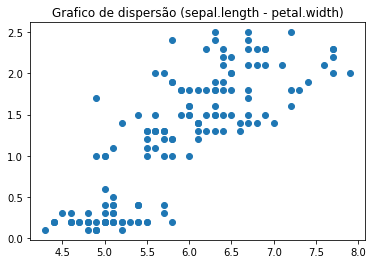

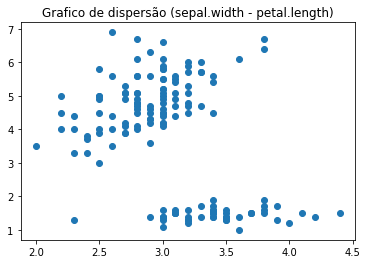

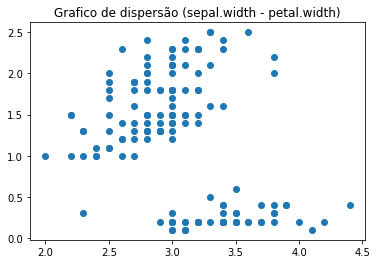

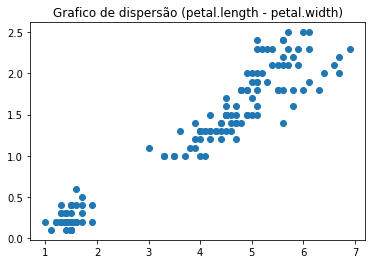

In [33]:
import matplotlib.pyplot as plt

i = 0
j = 0

columns = data_iris.columns.to_list()

while (i < 4):
    while (j < 4):
        if(j > i):
            plt.title('Grafico de dispersão (' + columns[i] + ' - ' + columns[j]+')')
            plt.scatter(data_iris[columns[i]], data_iris[columns[j]])
            plt.show()
        j += 1
    i += 1
    j = 0

#### (d) Gere o diagrama de dispersão para cada par de variáveis numéricas. Utilize uma cor (ou símbolo) único para cada classe, com o objetivo de realçar cada classe.

In [34]:
data_iris.variety.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
map = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data_iris['variety'] = data_iris.variety.map(map)


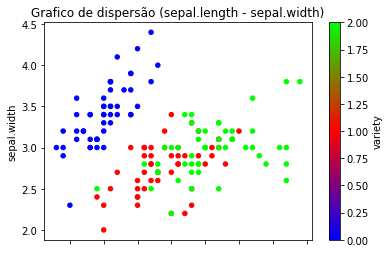

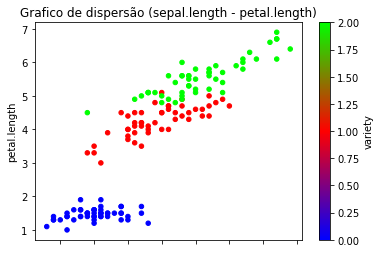

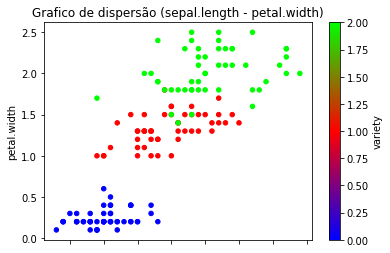

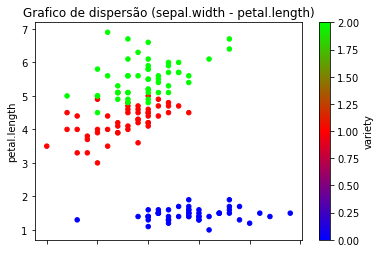

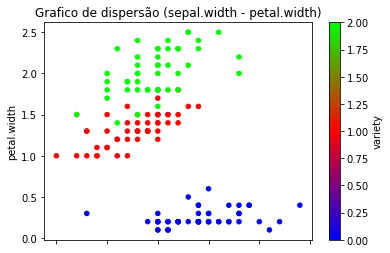

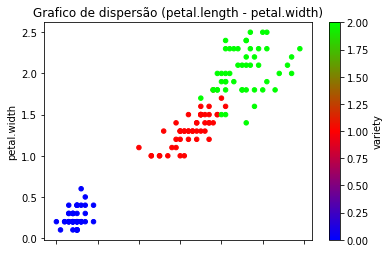

In [36]:
i = 0
j = 0

columns = data_iris.columns.to_list()

while (i < 4):
    while (j < 4):
        if(j > i):
            ax = data_iris.plot.scatter(x=i, y=j, c='variety', colormap='brg')
            plt.title('Grafico de dispersão (' + columns[i] + ' - ' + columns[j]+')')
        j += 1
    i += 1
    j = 0



### 2) Utilizando a base de dados archive.ics.uci.edu/ml/datasets/skin+segmentation:

#### (a) Gere o gráfico de compartimentos hexagonais para cada par de variáveis numéricas

<AxesSubplot:xlabel='R', ylabel='B'>

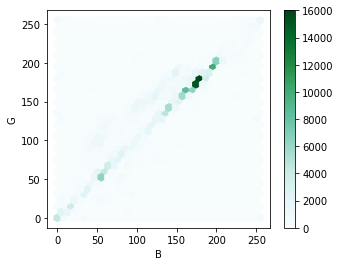

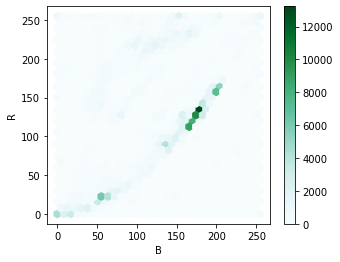

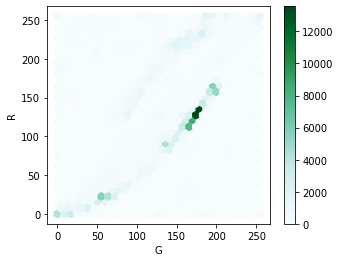

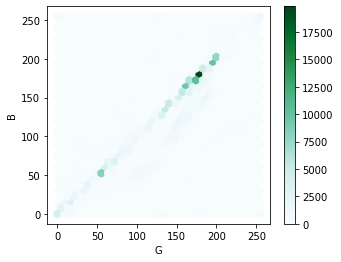

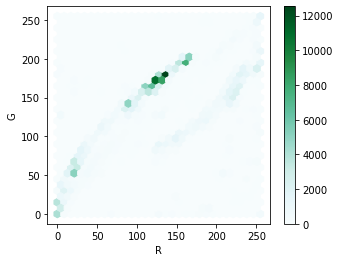

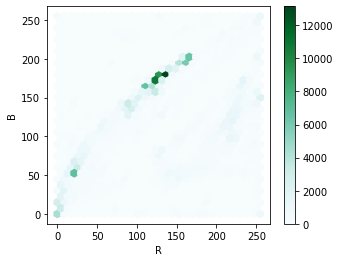

In [2]:
data_skin = pd.read_csv("Skin_NonSkin.csv")

data_skin.plot.hexbin(x='B', y='G', gridsize=30, figsize=(5,4), sharex=False)

data_skin.plot.hexbin(x='B', y='R', gridsize=30, figsize=(5,4), sharex=False)

data_skin.plot.hexbin(x='G', y='R', gridsize=30, figsize=(5,4), sharex=False)

data_skin.plot.hexbin(x='G', y='B', gridsize=30, figsize=(5,4), sharex=False)

data_skin.plot.hexbin(x='R', y='G', gridsize=30, figsize=(5,4), sharex=False)

data_skin.plot.hexbin(x='R', y='B', gridsize=30, figsize=(5,4), sharex=False)

#### (b) Separadamente para cada classe, gere o gráfico de compartimentos hexagonais para cada par de variáveis numéricas

<AxesSubplot:xlabel='R', ylabel='B'>

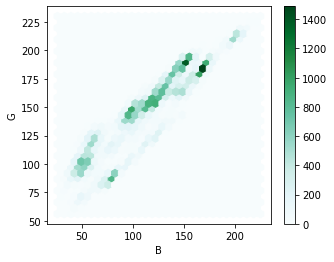

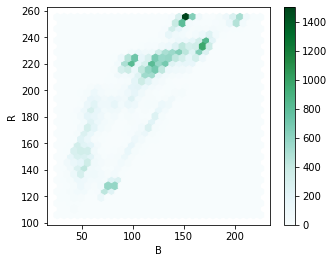

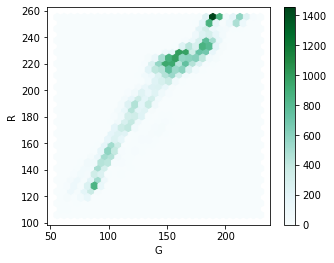

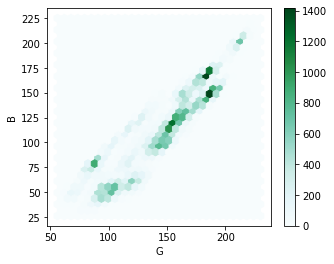

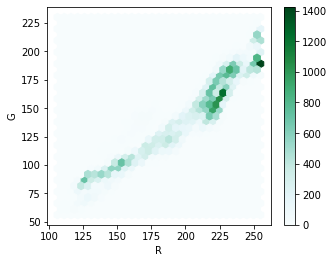

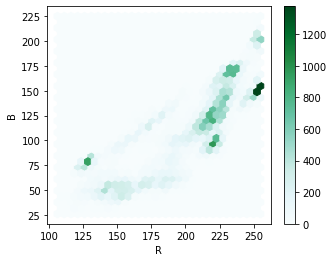

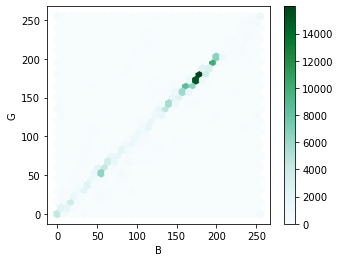

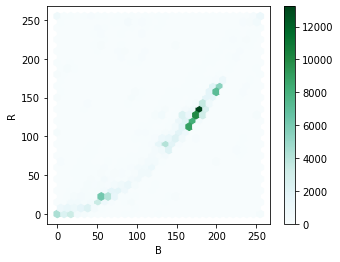

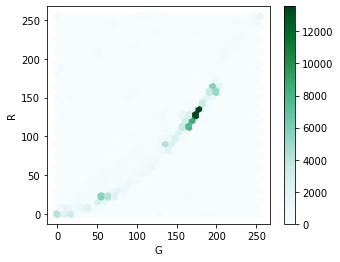

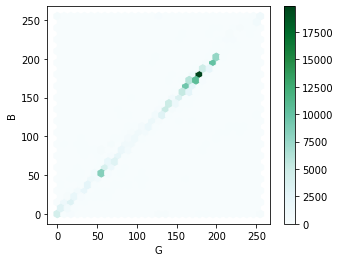

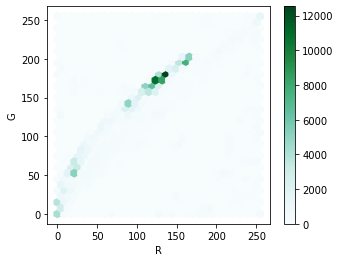

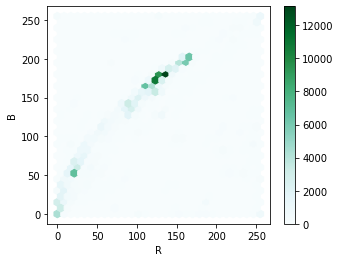

In [3]:
data_class_1 = data_skin[:50859]
data_class_2 = data_skin[50859:]

data_class_1.plot.hexbin(x='B', y='G', gridsize=30, figsize=(5,4), sharex=False)

data_class_1.plot.hexbin(x='B', y='R', gridsize=30, figsize=(5,4), sharex=False)

data_class_1.plot.hexbin(x='G', y='R', gridsize=30, figsize=(5,4), sharex=False)

data_class_1.plot.hexbin(x='G', y='B', gridsize=30, figsize=(5,4), sharex=False)

data_class_1.plot.hexbin(x='R', y='G', gridsize=30, figsize=(5,4), sharex=False)

data_class_1.plot.hexbin(x='R', y='B', gridsize=30, figsize=(5,4), sharex=False)

data_class_2.plot.hexbin(x='B', y='G', gridsize=30, figsize=(5,4), sharex=False)

data_class_2.plot.hexbin(x='B', y='R', gridsize=30, figsize=(5,4), sharex=False)

data_class_2.plot.hexbin(x='G', y='R', gridsize=30, figsize=(5,4), sharex=False)

data_class_2.plot.hexbin(x='G', y='B', gridsize=30, figsize=(5,4), sharex=False)

data_class_2.plot.hexbin(x='R', y='G', gridsize=30, figsize=(5,4), sharex=False)

data_class_2.plot.hexbin(x='R', y='B', gridsize=30, figsize=(5,4), sharex=False)


#### (c) Gere o gráfico de contornos para cada par de variáveis numéricas.

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


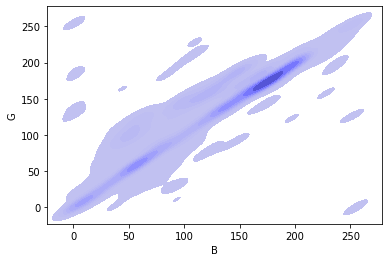

In [40]:
import seaborn as sb
import matplotlib.pyplot as pyp

res = sb.kdeplot(data_skin['B'],data_skin['G'],color='blue',shade=True)

pyp.show()

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


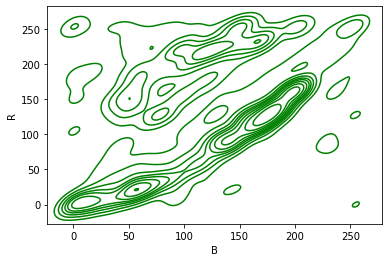

In [8]:
import seaborn as sb2

res2 = sb2.kdeplot(data_skin['B'],data_skin['R'],color='green',shade=False)


c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


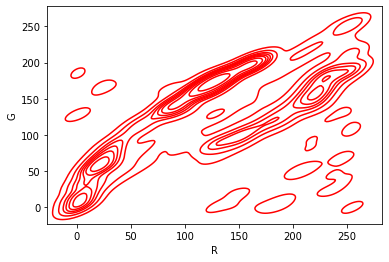

In [9]:
import seaborn as sb3

res3 = sb3.kdeplot(data_skin['R'],data_skin['G'],color='red',shade=False)

#### (d)  Separadamete para cada classe, gere o gráfico de contornos para cada par de variáveis numéricas.

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


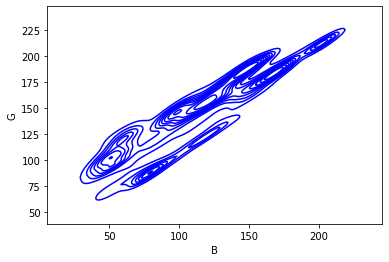

In [10]:
import seaborn as sb4

res4 = sb4.kdeplot(data_class_1['B'],data_class_1['G'],color='blue',shade=False)



c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


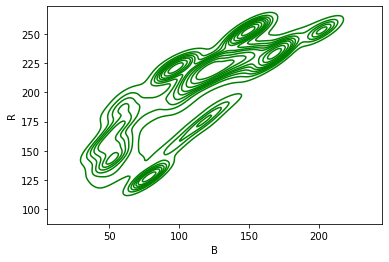

In [9]:
import seaborn as sb5

res5 = sb5.kdeplot(data_class_1['B'],data_class_1['R'],color='green',shade=False)


c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


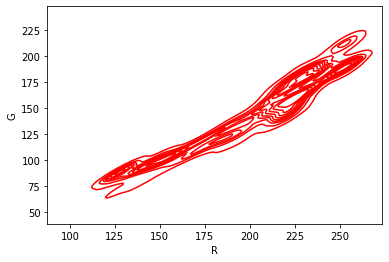

In [12]:
import seaborn as sb6

res6 = sb6.kdeplot(data_class_1['R'],data_class_1['G'],color='red',shade=False)

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


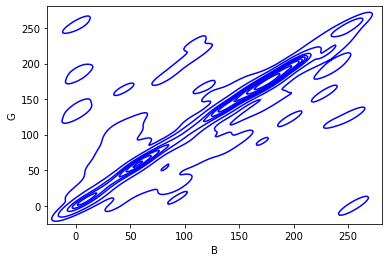

In [4]:
import seaborn as sb7

res7 = sb7.kdeplot(data_class_2['B'],data_class_2['G'],color='blue',shade=False)

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


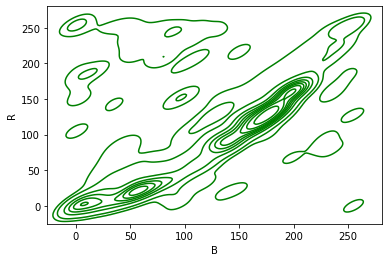

In [10]:
import seaborn as sb8

res8 = sb8.kdeplot(data_class_2['B'],data_class_2['R'],color='green',shade=False)

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


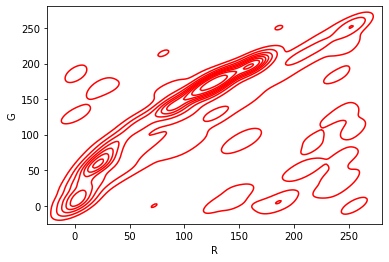

In [6]:
import seaborn as sb9

res9 = sb9.kdeplot(data_class_2['R'],data_class_2['G'],color='red',shade=False)

### 3) Utilizando a base de dados archive.ics.uci.edu/ml/datasets/Car+Evaluation, gere uma tabela de contingência analisando cada variável em função da classe.

In [ ]:
data_car = pd.read_csv("car.csv")
data_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
col_names = data_car.drop(['class'], axis=1).columns.to_list()
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
frames = []

for i in col_names:
    frames.append(pd.DataFrame(pd.crosstab(data_car[i], data_car['class'], margins=True)))

pd.concat(frames, keys=col_names)

class           acc  good  unacc  vgood   All
buying   high   108     0    324      0   432
         low     89    46    258     39   432
         med    115    23    268     26   432
         vhigh   72     0    360      0   432
         All    384    69   1210     65  1728
maint    high   105     0    314     13   432
         low     92    46    268     26   432
         med    115    23    268     26   432
         vhigh   72     0    360      0   432
         All    384    69   1210     65  1728
doors    2       81    15    326     10   432
         3       99    18    300     15   432
         4      102    18    292     20   432
         5more  102    18    292     20   432
         All    384    69   1210     65  1728
persons  2        0     0    576      0   576
         4      198    36    312     30   576
         more   186    33    322     35   576
         All    384    69   1210     65  1728
lug_boot big    144    24    368     40   576
         med    135    24    392     25   576
         small  105    21    450      0   576
         All    384    69   1210     65  1728
safety   high   204    30    277     65   576
         low      0     0    576      0   576
         med    180    39    357      0   576
         All    384    69   1210     65  1728

In [ ]:
pd.set_option('display.max_rows', 1000)
frames = []

for i in col_names:
    frames.append(pd.DataFrame({'Freq_abs':data_car[i].groupby(data_car['class']).value_counts(),
    'Freq_rel (%)':round(data_car[i].groupby(data_car['class']).value_counts(normalize=True)*100, 2)}))
    

pd.concat(frames, keys=col_names)

Freq_abs  Freq_rel (%)
         class                              
buying   acc   med         115         29.95
               high        108         28.12
               low          89         23.18
               vhigh        72         18.75
         good  low          46         66.67
               med          23         33.33
         unacc vhigh       360         29.75
               high        324         26.78
               med         268         22.15
               low         258         21.32
         vgood low          39         60.00
               med          26         40.00
maint    acc   med         115         29.95
               high        105         27.34
               low          92         23.96
               vhigh        72         18.75
         good  low          46         66.67
               med          23         33.33
         unacc vhigh       360         29.75
               high        314         25.95
               low         268         22.15
               med         268         22.15
         vgood low          26         40.00
               med          26         40.00
               high         13         20.00
doors    acc   4           102         26.56
               5more       102         26.56
               3            99         25.78
               2            81         21.09
         good  3            18         26.09
               4            18         26.09
               5more        18         26.09
               2            15         21.74
         unacc 2           326         26.94
               3           300         24.79
               4           292         24.13
               5more       292         24.13
         vgood 4            20         30.77
               5more        20         30.77
               3            15         23.08
               2            10         15.38
persons  acc   4           198         51.56
               more        186         48.44
         good  4            36         52.17
               more         33         47.83
         unacc 2           576         47.60
               more        322         26.61
               4           312         25.79
         vgood more         35         53.85
               4            30         46.15
lug_boot acc   big         144         37.50
               med         135         35.16
               small       105         27.34
         good  big          24         34.78
               med          24         34.78
               small        21         30.43
         unacc small       450         37.19
               med         392         32.40
               big         368         30.41
         vgood big          40         61.54
               med          25         38.46
safety   acc   high        204         53.12
               med         180         46.88
         good  med          39         56.52
               high         30         43.48
         unacc low         576         47.60
               med         357         29.50
               high        277         22.89
         vgood high         65        100.00

### 4) Para cada classe da a base Wine archive.ics.uci.edu/ml/datasets/Wine gere um gráfico de violinos com as todas as variáveis numéricas do problema.

In [ ]:
data_wine = pd.read_csv("wine.csv")

data_wine

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


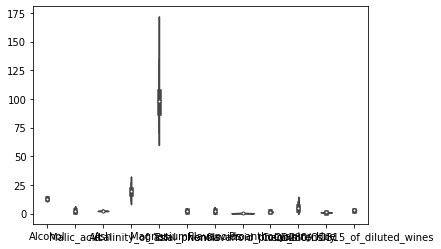

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_wine_wt_class = data_wine.drop(["Class","Proline"], axis=1)

sns.violinplot(data=data_wine_wt_class)

plt.show()